## Menyiapkan Library yang digunakan

<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Menyiapkan dan melihat data

In [22]:
df = pd.read_excel(r"C:\Users\acer\OneDrive - Universitas Diponegoro\project\perhitungan-volume-objek-simetri\dataset_telur.xlsx", usecols=['pixel', 'volume', 'jarak'])

print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
   pixel  volume  jarak
0  61460      60    0.3
1  66223      65    0.3
2  59072      55    0.3
3  61466      55    0.3
4  59938      55    0.3
Jumlah kolom dan baris dari data : (100, 3)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pixel   100 non-null    int64  
 1   volume  100 non-null    int64  
 2   jarak   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
data statistik :
              pixel      volume       jarak
count    100.000000  100.000000  100.000000
mean   46407.040000   59.250000    0.340000
std     9887.544429    4.286165    0.028427
min    28771.000000   50.000000    0.300000
25%    37807.500000   55.000000    0.320000
50%    44376.500000   60.000000    0.340000
75%    52872.750000   61.250000    0.360000
max    70240.000000   65.000000    0.380000


## Cek missing value

In [23]:
#Mencari dan menangani missing values
df.isnull().sum()

pixel     0
volume    0
jarak     0
dtype: int64

## Exploratory Data Analysis

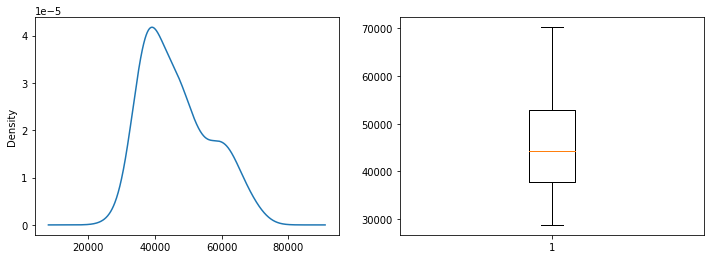

In [24]:
#Univariate analysis pixel

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['pixel'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['pixel'])

plt.show()

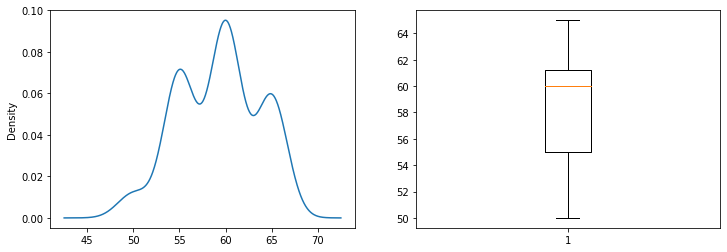

In [25]:
#Univariate analysis volume.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['volume'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['volume'])

plt.show()

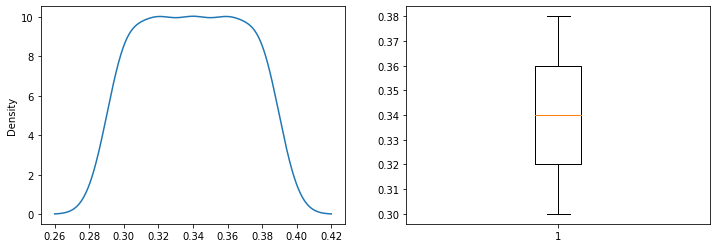

In [26]:
#Univariate analysis jarak

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['jarak'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['jarak'])

plt.show()

<Figure size 720x576 with 0 Axes>

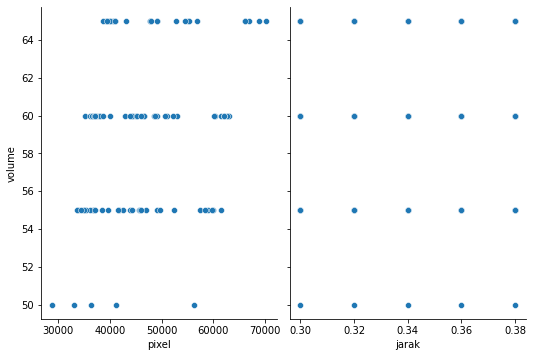

In [27]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['pixel', 'jarak'], y_vars=['volume'], height=5, aspect=0.75)

## Menghapus outlier

In [28]:
#df.drop(1, inplace=True)

In [29]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

C:\Users\acer\AppData\Local\Temp/ipykernel_7404/1563951346.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,pixel,volume,jarak
pixel,1.00,0.27,-0.90
volume,0.27,1.00,0.00
jarak,-0.90,0.00,1.00


## Modelling dan melihat akurasi prediksi

In [30]:
#variabel x dan y.
x = df.drop(columns='volume')
y = df['volume']

#split data menjadi training and testing dengan porsi 80 : 20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train.values, y_train.values)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[5.85930735e-04 1.76328689e+02]
-27.858301085671812


## Uji akurasi machine learning
Didapat akurasi sebesar 91%

In [31]:
#Accuracy score model
score = lin_reg.score(x_test.values, y_test.values) * 100

print ("Skor akurasi model machine learning :" ,round(score, 2), "%")

Skor akurasi model machine learning : 49.61 %


## Memprediksi volume

In [32]:
#Prediksi volume menggunakan machine learning dengan input Jarak, Pixel
lin_reg.predict([[0.35, 136567]])

array([24080652.22693362])